# Questions notebook

In [23]:
import functions as func
import numpy as np
from joblib import Parallel, delayed

### Question 1

In [24]:
df = func.getUseableHPData()
X = df.copy(deep=True)
X.drop("SalePrice", axis=1, inplace=True)
y = df["SalePrice"]

model_1_mae = func.trainLinearRegression(X, y)
model_1_mae

19785.969261960552

### Question 2

In [25]:
#get first new predictor
colnames = list(df.columns)
colnames.remove("SalePrice")
colnames = [[x] for x in colnames]
results = Parallel(n_jobs=6)(delayed(func.quickScoreLinearRegression)(i, False) for i in colnames)
first_new_colname = colnames[np.argmax(results)][0]
print(f"Therefore we now add {first_new_colname} as a model feature")

Therefore we now add HouseStyle_2.5Fin as a model feature


In [30]:
#get second new predictor
colnames2 = list(df.columns)
colnames2.remove("SalePrice")
colnames2.remove(first_new_colname)
colnames2 = [[x, first_new_colname] for x in colnames2]
results = Parallel(n_jobs=6)(delayed(func.quickScoreLinearRegression)(i) for i in colnames2)
second_new_colname = colnames2[np.argmax(results)][0]
print(f"Therefore we now add {second_new_colname} as a model feature")

Therefore we now add Foundation_Stone as a model feature


In [31]:
#get third and final new predictor
colnames3 = list(df.columns)
colnames3.remove("SalePrice")
colnames3.remove(first_new_colname)
colnames3.remove(second_new_colname)
colnames3 = [[x, first_new_colname, second_new_colname] for x in colnames3]
results = Parallel(n_jobs=6)(delayed(func.quickScoreLinearRegression)(i) for i in colnames3)
third_new_colname = colnames3[np.argmax(results)][0]
print(f"Finally we add {third_new_colname} as a model feature")
print(f"This gives our model a MAE of {min(results)}.")

Finally we add YrSold as a model feature
This gives our model a MAE of 33772.5695092464.


In [32]:
#what happens if we use a fourth predictor?
colnames4 = list(df.columns)
colnames4.remove("SalePrice")
colnames4.remove(first_new_colname)
colnames4.remove(second_new_colname)
colnames4.remove(third_new_colname)
colnames4 = [[x, first_new_colname, second_new_colname, third_new_colname] for x in colnames4]
results = Parallel(n_jobs=6)(delayed(func.quickScoreLinearRegression)(i) for i in colnames4)
fourth_new_colname = colnames4[np.argmax(results)][0]
print(f"to experiment we add {fourth_new_colname} as a fourth model feature")
print(f"This gives our model a MAE of {min(results)}.")

to experiment we add RoofStyle_Gambrel as a fourth model feature
This gives our model a MAE of 33785.019580691616.


In [33]:
# clear environment
%reset -f

### Question 3

In [35]:
#imports and data loads
import matplotlib.pyplot as plt
import functions as func
import numpy as np

df = func.getUseableHPData()

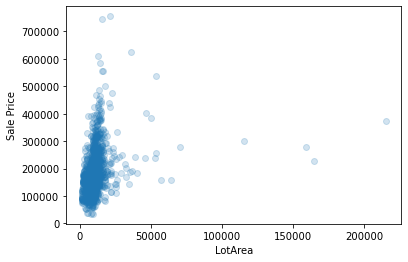

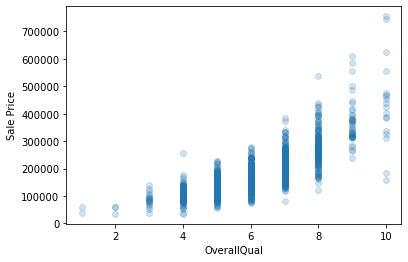

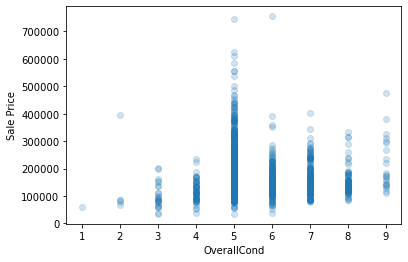

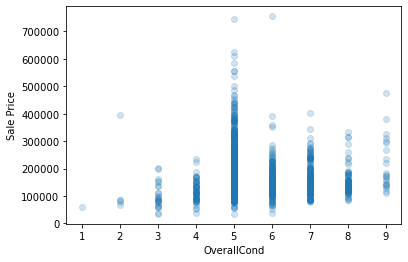

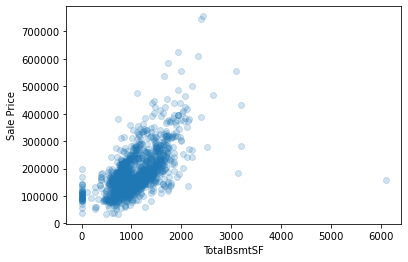

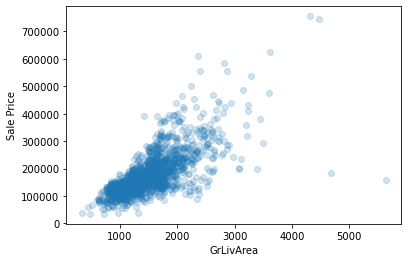

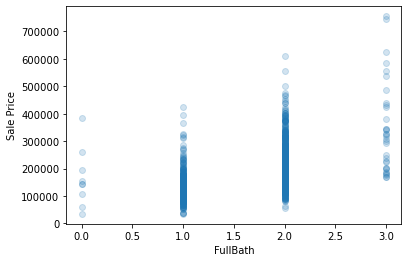

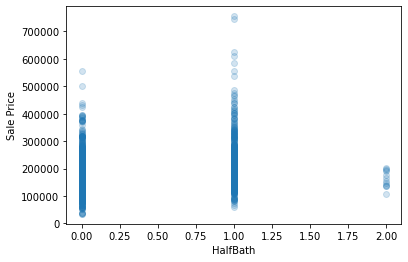

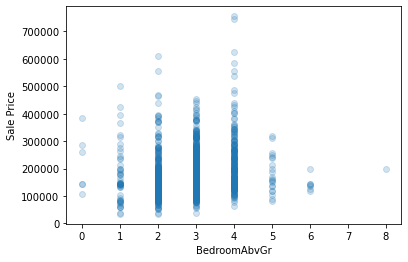

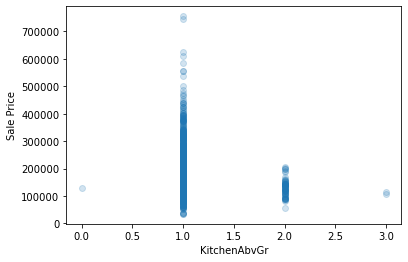

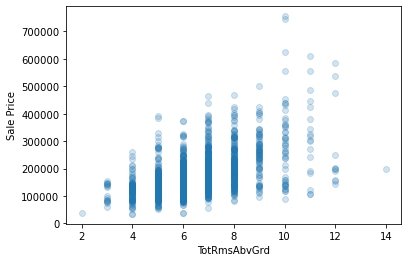

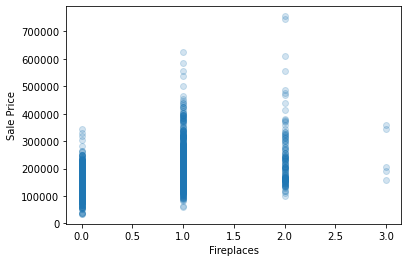

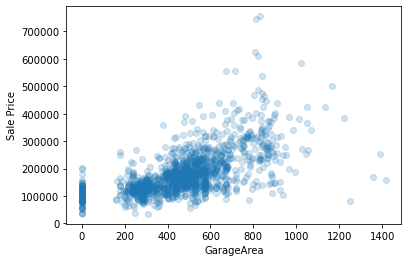

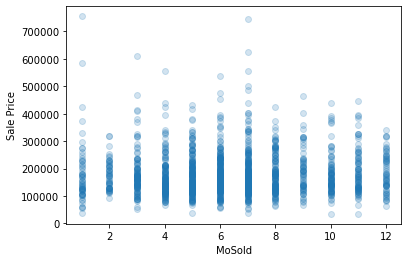

In [36]:
#plot all useful columns
cols_to_investigate = ["LotArea", "OverallQual", "OverallCond", "OverallCond", "TotalBsmtSF", "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageArea", "MoSold"]
for i in cols_to_investigate:
    plt.scatter(x=df[i].tolist(), y = df["SalePrice"].tolist(), alpha=0.2)
    plt.xlabel(i)
    plt.ylabel("Sale Price")
    plt.show()

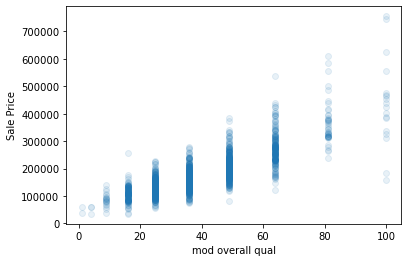

In [37]:
#look at first modification. It "looks more linear"...
mod_oq = [np.power(x, 2) for x in df["OverallQual"].tolist()]
plt.scatter(x=mod_oq, y = df["SalePrice"].tolist(), alpha=0.1)
plt.xlabel("mod overall qual")
plt.ylabel("Sale Price")
plt.show()

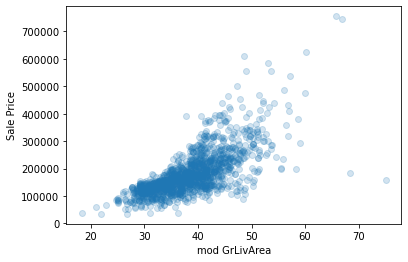

In [38]:
mod_gla = [np.sqrt(x) for x in df["GrLivArea"].tolist()]
plt.scatter(x=mod_gla, y = df["SalePrice"].tolist(), alpha=0.2)
plt.xlabel("mod GrLivArea")
plt.ylabel("Sale Price")
plt.show()

In [39]:
#replace columns in dataframe with modified versions and rerun first model
df["GrLivArea"] = mod_gla
df["OverallQual"] = mod_oq

X = df.copy(deep=True)
X.drop("SalePrice", axis=1, inplace=True)
y = df["SalePrice"]
modified_model_mae = func.trainLinearRegression(X, y)
modified_model_mae

19754.15460774869

In [3]:
# clear environment
%reset -f

## Question 4

In [1]:
# import libraries and read new data
import functions as func
import numpy as np

df = func.getUseableHP2Data()

In [5]:
# fit full model with this data
X = df.copy(deep=True)
X.drop("SalePrice", axis=1, inplace=True)
y = df["SalePrice"]
q4_baseline_mae = func.trainLinearRegression(X, y)
q4_baseline_mae

19441.329700827828

In [6]:
#fit random forest regression
rf_mae = func.trainRandomForest(X, y)
rf_mae

15250.89

In [2]:
#fit linear model with lasso loss function
lasso_mae = func.trainLassoLinearRegression(X, y)
lasso_mae

20914.055539264285